In [111]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
import math
from mpl_toolkits.mplot3d import Axes3D

# parameters
PI = 3.1415926
TR = 100
gamma = 2e0*PI*42.58*1000      #[rad/(ms.T)]
t1 = 250      #[ms]   #The values of T1 were assumed to be uniform and values in general fat were adopted.
t2 = 60       #[ms]   #The values of T2 were assumed to be uniform and values in general fat were adopted.
bx = 0.0
by = 0.0
bz = 10.0   # gradient magnetic field in y direction
alpha = 30
pd = 100.0
m0 = pd     # m0 -> 

# initial m
mx_init = 0.0
my_init = pd * math.sin(math.radians(alpha))
mz_init = pd * math.cos(math.radians(alpha))
m_init = [mx_init, my_init, mz_init]


# preparation of calculation
dx = 2   # 256[mm] / 128[pixel]
dy = 2   # 256[mm] / 128[pixel]
gx = 5
gy = 5
bz = gx + gy
FOV = [256, 256]
timeInterval = 1e-2   #[ms]
omega = (2*PI/FOV[0] + 2*PI/FOV[1])*bz


# bloch equation
def Bloch(t, m, t1, t2, m0, omega):
    mx = m[0]
    my = m[1]
    mz = m[2]
    dmxdt = omega*my - mx/t2
    dmydt = -omega*mx - my/t2
    dmzdt = - (mz-m0)/t1
    dmdt = np.hstack([dmxdt, dmydt, dmzdt])
    return dmdt



In [112]:
# preparation of numerical calculations
t_min = 0
t_max = TR
dt = 1e-2
t = np.arange(t_min, t_max, dt)
t_span = (t_min, t_max)



# numerical calculations
sol = solve_ivp(Bloch, t_span, m_init, method='RK45', t_eval=t, args=(t1, t2, m0, omega,))

In [113]:
print("t.shape:", t.shape)
print(t[0:20])

t.shape: (10000,)
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19]


RK45」(デフォルト): 5(4)次数の陽解法ルンゲクッタ法 [1]. 4次法の精度を仮定して誤差を制御しますが, 5次法の精度の式を使ってステップを踏みます(局所的な外挿を行います). 密な出力には4次補間多項式が使われる[2]。複素数領域で適用可能。


x: (10000,)
y: (10000,)
z: (10000,)
t: (10000,)
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19]


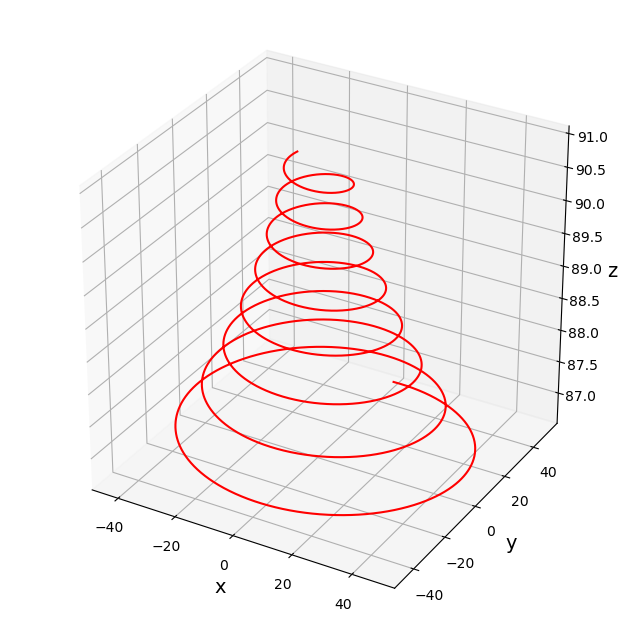

In [114]:
# Figure
fig = plt.figure(figsize = (8, 8))

# 3DAxes
ax = fig.add_subplot(111, projection='3d')

# ax label
ax.set_xlabel("x", size = 14)
ax.set_ylabel("y", size = 14)
ax.set_zlabel("z", size = 14)

t_value = sol.t
x_value = sol.y[0,]
y_value = sol.y[1,]
z_value = sol.y[2,]

# plot
ax.plot(x_value, y_value, z_value, color = "red")
print("x:", x_value.shape)
print("y:", y_value.shape)
print("z:", z_value.shape)
print("t:", t_value.shape)
print(t_value[0:20])

In [92]:
x_value.shape


(10000,)

x: (10000,)
y: (10000,)
z: (10000,)
t: (10000,)
[ 0.          0.24539503  0.49070236  0.7359161   0.98103037  1.22603928
  1.47093696  1.71571764  1.96037574  2.20490539  2.44930067  2.69355567
  2.9376645   3.18162126  3.42542007  3.66905508  3.91252042  4.15581023
  4.39891869  4.64183995  4.88456821  5.12709765  5.36942246  5.61153687
  5.85343508  6.09511133  6.33655985  6.5777749   6.81875072  7.05948159
  7.29996178  7.54018559  7.7801473   8.01984122  8.25926168  8.49840299
  8.73725948  8.97582552  9.21409544  9.45206362  9.68972443  9.92707225
 10.16410148 10.40080651 10.63718177 10.87322168 11.10892066 11.34427316
 11.57927364 11.81391655 12.04819637 12.28210757 12.51564465 12.74880211
 12.98157445 13.21395621 13.4459419  13.67752607 13.90870327 14.13946805]


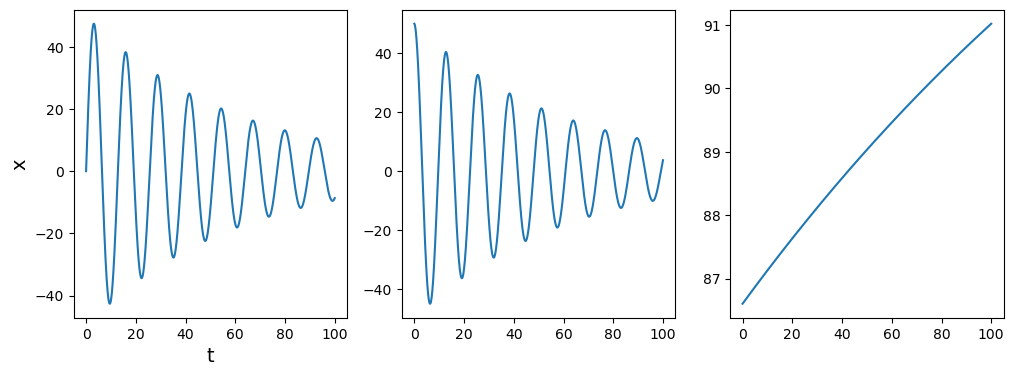

In [93]:
#figure．
fig = plt.figure(figsize = (12, 4))

#add_subplot
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


ax1.plot(t_value, x_value)
# ax label
ax1.set_xlabel("t", size = 14)
ax1.set_ylabel("x", size = 14)

ax2.plot(t_value, y_value)
ax3.plot(t_value, z_value)

print("x:", x_value.shape)
print("y:", y_value.shape)
print("z:", z_value.shape)
print("t:", t_value.shape)
print(x_value[0:60])

# Bloch方程式の解析解と数値解の比較

## (1) 準備

In [220]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
from scipy.integrate import solve_ivp
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

# parameters
PI = 3.1415926
TR = 1000         # [ms]
gamma = 2e0*PI*42.58*1000      # [rad/(ms.T)]
# The values of T1 were assumed to be uniform and values in general fat water.
t1 = 1200      # [ms]
t2 = 200      # [ms]
bx = 0.0
by = 0.0
bz = 10.0   # gradient magnetic field in y direction
alpha = 30
pd = 100.0
m0 = pd     # m0
timeInterval = 1e-2   # [ms]
timeInterval_runge = 1e-3
sample_time = int(TR / timeInterval)

dx = 2   # 256[mm] / 128[pixel]
dy = 2   # 256[mm] / 128[pixel]
gx = 5
gy = 5
bz = gx + gy
FOV = [256, 256]
t_min = 0
t_max = TR
t = np.arange(t_min, t_max, timeInterval)
t_eval = np.arange(t_min, t_max, timeInterval)
t_eval_runge = np.arange(t_min, t_max, timeInterval_runge)
t_span = (t_min, t_max)


# initial m
mx_init = 0.0
my_init = pd * math.sin(math.radians(alpha))
mz_init = pd * math.cos(math.radians(alpha))
m_init = [mx_init, my_init, mz_init]


# preparation of numerical calculation
# omega = (2*PI/FOV[0] + 2*PI/FOV[1])*bz
omega = (2*PI*gx/FOV[0] + 2*PI*gy/FOV[1]) / timeInterval


# preparation of calculation
phase = 2*PI*gx/FOV[0] + 2*PI*gy/FOV[1]
E1_analy = math.exp(-timeInterval / t1)
E2_analy = math.exp(-timeInterval / t2)


# bloch equation
def Bloch_runge(t, m, t1, t2, m0, omega):
    mx = m[0]
    my = m[1]
    mz = m[2]
    dmxdt = omega*my - mx/t2
    dmydt = -omega*mx - my/t2
    dmzdt = - (mz-m0)/t1
    dmdt = np.hstack([dmxdt, dmydt, dmzdt])
    return dmdt


# bloch equation
def Bloch_adam(m, t, t1, t2, m0, omega):
    dmxdt = omega*m[1] - m[0]/t2
    dmydt = -omega*m[0] - m[1]/t2
    dmzdt = - (m[2]-m0)/t1
    return [dmxdt, dmydt, dmzdt]


def plot3d(x_list, y_list, z_list, x_title, y_title, z_title, title):
    fig = plt.figure(figsize=(4, 4))

    # 3DAxes
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_list, y_list, z_list)

    # ax label
    ax.set_xlabel(x_title, size=14)
    ax.set_ylabel(y_title, size=14)
    ax.set_zlabel(z_title, size=14)
    ax.set_title(title, size=14)


def plot2d_3(t_list, x_list, y_list, z_list,
             t_title, x_title, y_title, z_title, title):
    # 3DAxes
    fig = plt.figure(figsize=(17, 4))
    # title
    plt.title(title)
    # add_subplot
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    # plot
    ax1.plot(t_list, x_list)
    ax2.plot(t_list, y_list)
    ax3.plot(t_list, z_list)
    # ax label
    ax1.set_xlabel(t_title, size=14)
    ax1.set_ylabel(x_title, size=14)
    ax2.set_xlabel(t_title, size=14)
    ax2.set_ylabel(y_title, size=14)
    ax3.set_xlabel(t_title, size=14)
    ax3.set_ylabel(z_title, size=14)


def calc_norm_2d(x_list, y_list):
    abs_list = np.sqrt(x_list ** 2 + y_list ** 2)
    return [x_list / abs_list, y_list / abs_list]


def calc_square(list_2d):
    return list_2d[0] ** 2 + list_2d[1] ** 2


def calcu_phase_dif_2d(x0_list, y0_list, x1_list, y1_list):
    norm0 = calc_norm_2d(x0_list, y0_list)
    norm1 = calc_norm_2d(x1_list, y1_list)

    cos_phase_dif = (norm0[0]*norm1[0] + norm0[1]*norm1[1]) / calc_square(norm0)
    sin_phase_dif = (norm1[1]*norm0[0] - norm0[1]*norm1[0]) / calc_square(norm0)
    return np.arctan2(sin_phase_dif, cos_phase_dif)


# preparation of analytical calculation
# initialize
mx_analy = np.zeros(sample_time)
my_analy = np.zeros(sample_time)
mz_analy = np.zeros(sample_time)

mx_analy[0] = mx_init
my_analy[0] = my_init
mz_analy[0] = mz_init


## (2)  数値解（ルンゲクッタ）

In [221]:
# numerical calculations
sol_runge = solve_ivp(Bloch_runge, t_span, m_init, method='RK45', 
                      t_eval=t_eval_runge, args=(t1, t2, m0, omega,))
# store
t_sol_runge = sol_runge.t[::10]
x_sol_runge = sol_runge.y[0, ::10]
y_sol_runge = sol_runge.y[1, ::10]
z_sol_runge = sol_runge.y[2, ::10]
# plot
# plot3d(x_sol_runge, y_sol_runge, z_sol_runge, "x", "y", "z", "runge_kutta")

In [222]:
# figure．
# plot2d_3(t_sol_runge, x_sol_runge, y_sol_runge, z_sol_runge,
#          "t [ms]", "x", "y", "z", "runge_kutta")

##  (3) 数値解（アダムスモールトン）

In [223]:
# numerical calculations
sol_adam = odeint(Bloch_adam, m_init, t_eval, args=(t1, t2, m0, omega))
# store
t_sol_adam = t_sol_runge
x_sol_adam = sol_adam[:, 0]
y_sol_adam = sol_adam[:, 1]
z_sol_adam = sol_adam[:, 2]

# plot
# plot3d(x_sol_adam, y_sol_adam, z_sol_adam, "x", "y", "z", "adam")

In [224]:
# plot
# plot2d_3(t_sol_adam, x_sol_adam, y_sol_adam, z_sol_adam,
#         "t[ms]", "x", "y", "z", "adam")

##  (4) 解析解

In [225]:
# analytical Bloch equation solution
for i in range(sample_time - 1):
    mx_t = mx_analy[i]
    my_t = my_analy[i]
    mz_t = mz_analy[i]

    mx_analy[i + 1] = (mx_t*math.cos(phase) + my_t*math.sin(phase)) * E2_analy
    my_analy[i + 1] = (-mx_t*math.sin(phase) + my_t*math.cos(phase)) * E2_analy
    mz_analy[i + 1] = E1_analy*mz_t + (1-E1_analy)*pd

# store
t_sol_analy = t
x_sol_analy = mx_analy
y_sol_analy = my_analy
z_sol_analy = mz_analy

# plot
# plot3d(x_sol_analy, y_sol_analy, z_sol_analy, "x", "y", "z", "analycal")

In [226]:
# plot
# plot2d_3(t_sol_analy, x_sol_analy, y_sol_analy, z_sol_analy,
#          "t [ms]", "x", "y", "z", "analycal")

## (5) 数値解と解析解の比較

### ・各軸方向の差

In [227]:
# plot
x_dif_runge_analy = x_sol_runge - x_sol_analy
y_dif_runge_analy = y_sol_runge - y_sol_analy
z_dif_runge_analy = z_sol_runge - z_sol_analy

# plot2d_3(t_sol_analy, x_dif_runge_analy, y_dif_runge_analy, z_dif_runge_analy,
#         "t [ms]", "x dif", "y dif", "z dif", "runge vs analytical")

In [228]:
#plot
x_dif_adam_analy = x_sol_adam - x_sol_analy
y_dif_adam_analy = y_sol_adam - y_sol_analy
z_dif_adam_analy = z_sol_adam - z_sol_analy

# plot2d_3(t_sol_adam, x_dif_adam_analy, y_dif_adam_analy, z_dif_adam_analy,
#          "t [ms]", "x dif", "y dif", "z dif", "adam vs analytical")

### ・絶対値の誤差

In [229]:
# calculate
square_runge = x_sol_runge ** 2 + y_sol_runge ** 2 + z_sol_runge ** 2
square_adam = x_sol_adam ** 2 + y_sol_adam ** 2 + z_sol_adam ** 2
square_analy = x_sol_analy ** 2 + y_sol_analy ** 2 + z_sol_analy ** 2

abs_runge = np.sqrt(square_runge)
abs_adam = np.sqrt(square_adam)
abs_analy = np.sqrt(square_analy)

In [230]:
# plot
# plot2d_3(t_sol_runge, abs_runge, abs_analy,
#          100 * (abs_runge-abs_analy) / abs_analy,
#          "t [ms]", "runge abs", "analytical abs",
#          "100 * abs_dif / analytical abs  [%]", "runge vs analy")

In [231]:
# plot
# plot2d_3(t_sol_adam, abs_adam, abs_analy,
#          100 * (abs_adam-abs_analy) / abs_analy,
#          "t [ms]", "adam abs", "analytical abs",
#          "100 * abs_dif / analytical abs  [%]", "adam vs analy")

### ・xy平面場の誤差

In [232]:
# calcutian
abs_runge_xy = np.sqrt(x_sol_runge ** 2 + y_sol_runge ** 2)
abs_adam_xy = np.sqrt(x_sol_adam ** 2 + y_sol_adam ** 2)
abs_analy_xy = np.sqrt(x_sol_analy ** 2 + y_sol_analy ** 2)

# plot
# plot2d_3(t_sol_runge, abs_runge_xy, abs_analy_xy,
#         100 * (abs_runge_xy-abs_analy_xy) / abs_analy_xy,
#         "t [ms]", "runge xy abs", "analytical xy abs",
#          "100 * abs_xy_dif / analytical xy abs  [%]", "runge vs analy")

In [233]:
# plot
# plot2d_3(t_sol_adam, abs_adam_xy, abs_analy_xy,
#          100 * (abs_adam_xy-abs_analy_xy) / abs_analy_xy,
#          "t [ms]", "adam xy abs", "analytical xy abs",
#          "100 * abs_xy_dif / analytical xy abs  [%]", "adam vs analy")

## (6) 数値解と解析解の比較（位相）

In [234]:
# calculation
phase_dif_runge_analy = calcu_phase_dif_2d(x_sol_runge, y_sol_runge,
                                           x_sol_analy, y_sol_analy)
phase_dif_adam_analy = calcu_phase_dif_2d(x_sol_adam, y_sol_adam,
                                          x_sol_analy, y_sol_analy)

### ・plot (adams vs analycal solution)

In [235]:
"""
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(1, 1, 1)
ax.plot(t_sol_runge, phase_dif_runge_analy)
ax.plot(t_sol_adam, phase_dif_adam_analy)

ax.set_title('phase difference', size=16)
ax.set_xlabel('t [ms]', size=16)
ax.set_ylabel('phase difference [rad]', size=16)
"""

"\nfig = plt.figure(figsize=(8, 8))\n\nax = fig.add_subplot(1, 1, 1)\nax.plot(t_sol_runge, phase_dif_runge_analy)\nax.plot(t_sol_adam, phase_dif_adam_analy)\n\nax.set_title('phase difference', size=16)\nax.set_xlabel('t [ms]', size=16)\nax.set_ylabel('phase difference [rad]', size=16)\n"

#　ゼミ発表

### ・絶対値

In [1]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np

# ここでスタイルを指定する
# 今回は'science'と'ieee'を利用してみる
plt.style.use(['science', 'ieee'])

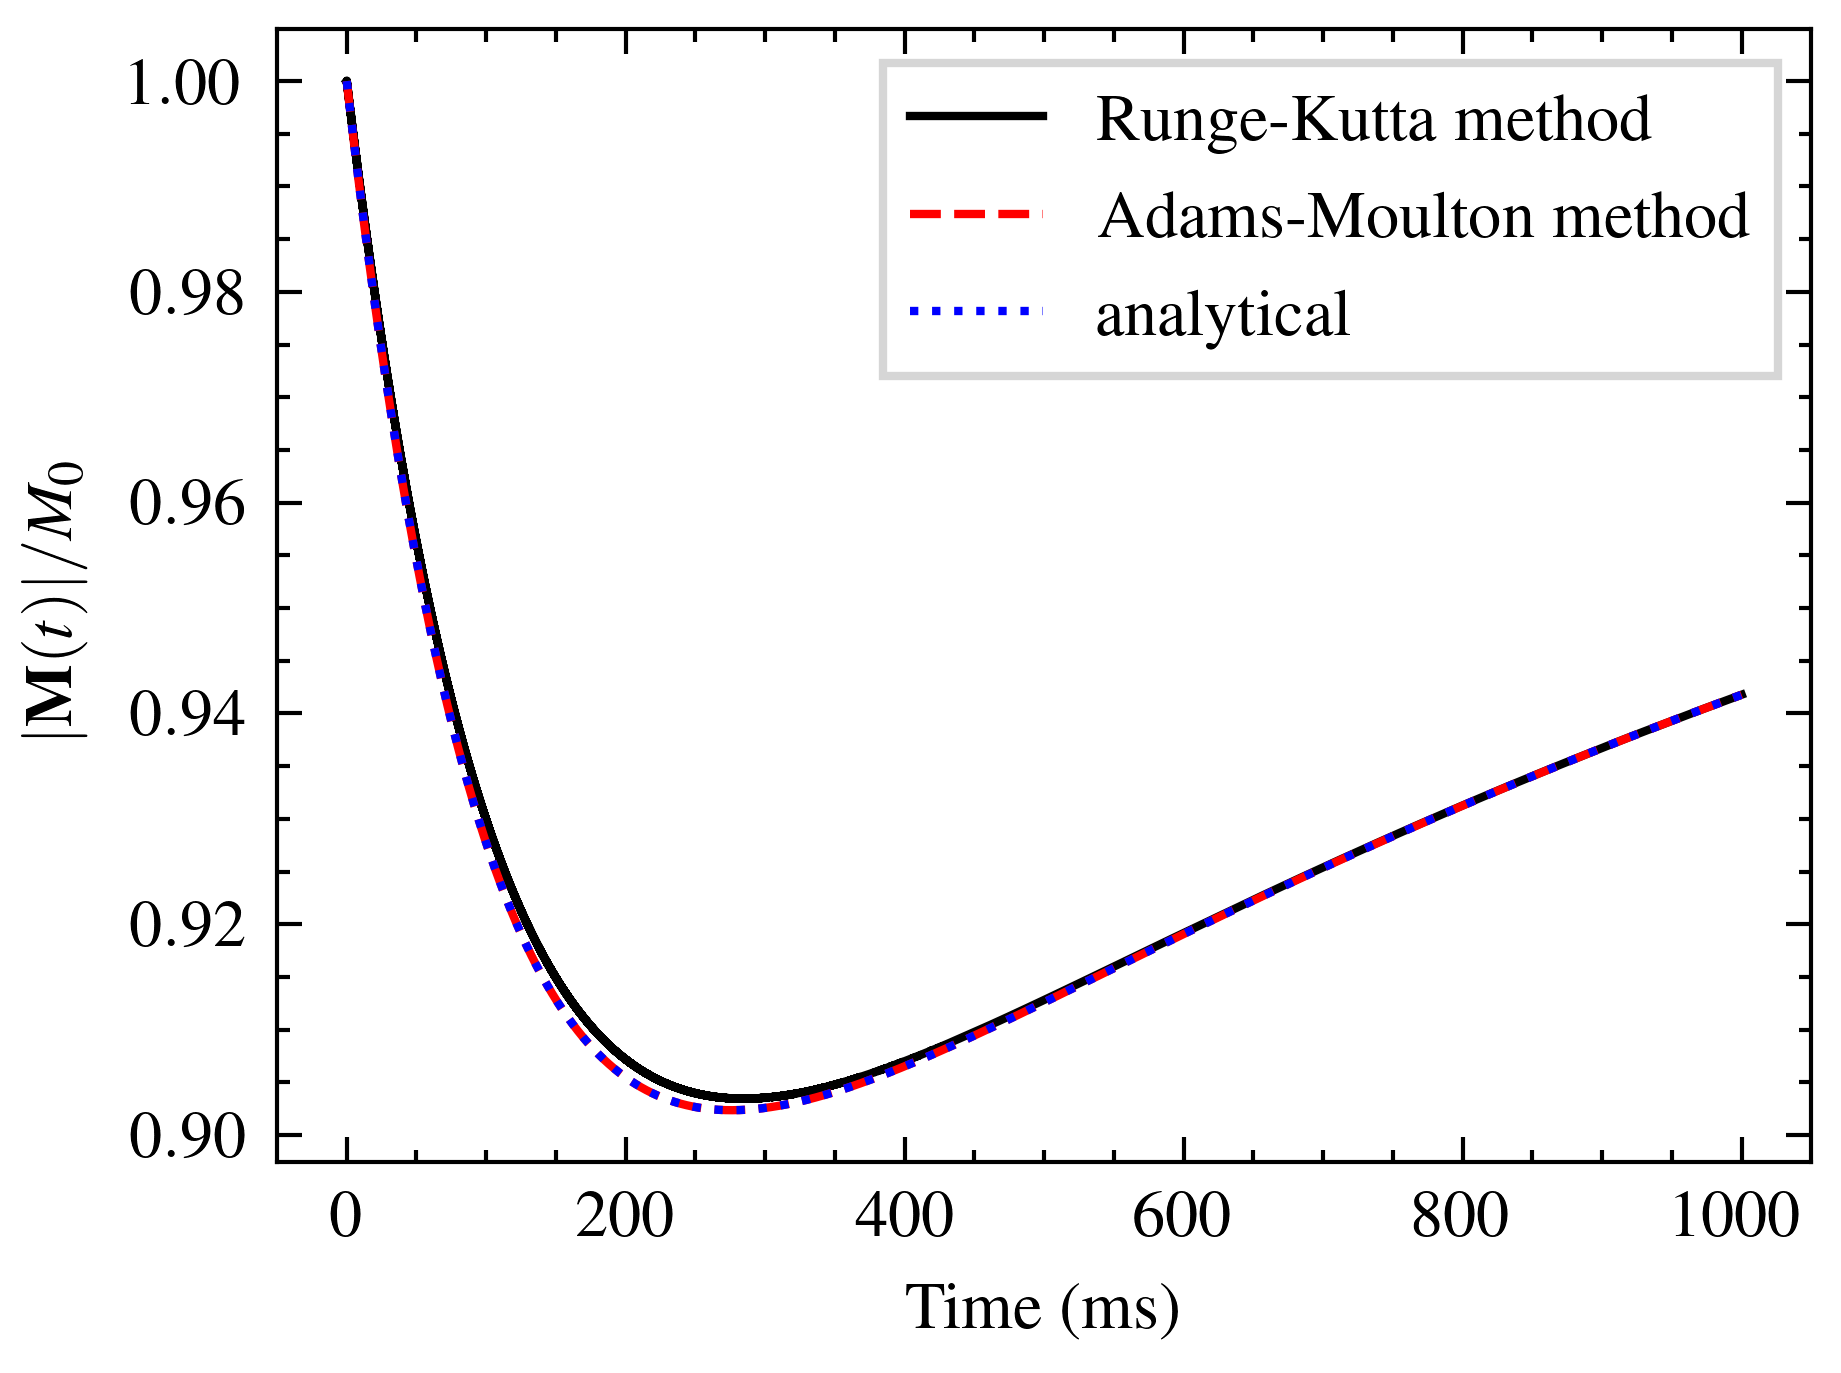

In [240]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np

# ここでスタイルを指定する
# 今回は'science'と'ieee'を利用してみる
plt.style.use(['science', 'ieee'])


# 図の表示
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_sol_runge, abs_runge / m0, label='Runge-Kutta method')  # 3Hzの波を表示
ax.plot(t_sol_runge, abs_adam / m0, label='Adams-Moulton method')
ax.plot(t_sol_runge, abs_analy / m0, label='analytical')   # 4Hzの波を表示
ax.legend(loc='upper right',
          fancybox=False, frameon=True)  # 凡例の細かい設定
ax.set(xlabel='Time (ms)')    # x軸のラベル
ax.set(ylabel=r"$ |\textbf{M}(t)|/M_0$")  # y軸のラベル
fig.show()


# ax.legend(title='solve', loc='upper right',
#          fancybox=False, frameon=True)  # 凡例の細かい設定

In [237]:
ratio_abs_runge = np.abs(abs_runge - abs_analy) / abs_analy
ratio_abs_adam = np.abs(abs_adam - abs_analy) / abs_analy

max_ratio_abs_runge = np.max(ratio_abs_runge)
max_ratio_abs_adam = np.max(ratio_abs_adam)

### ・位相差

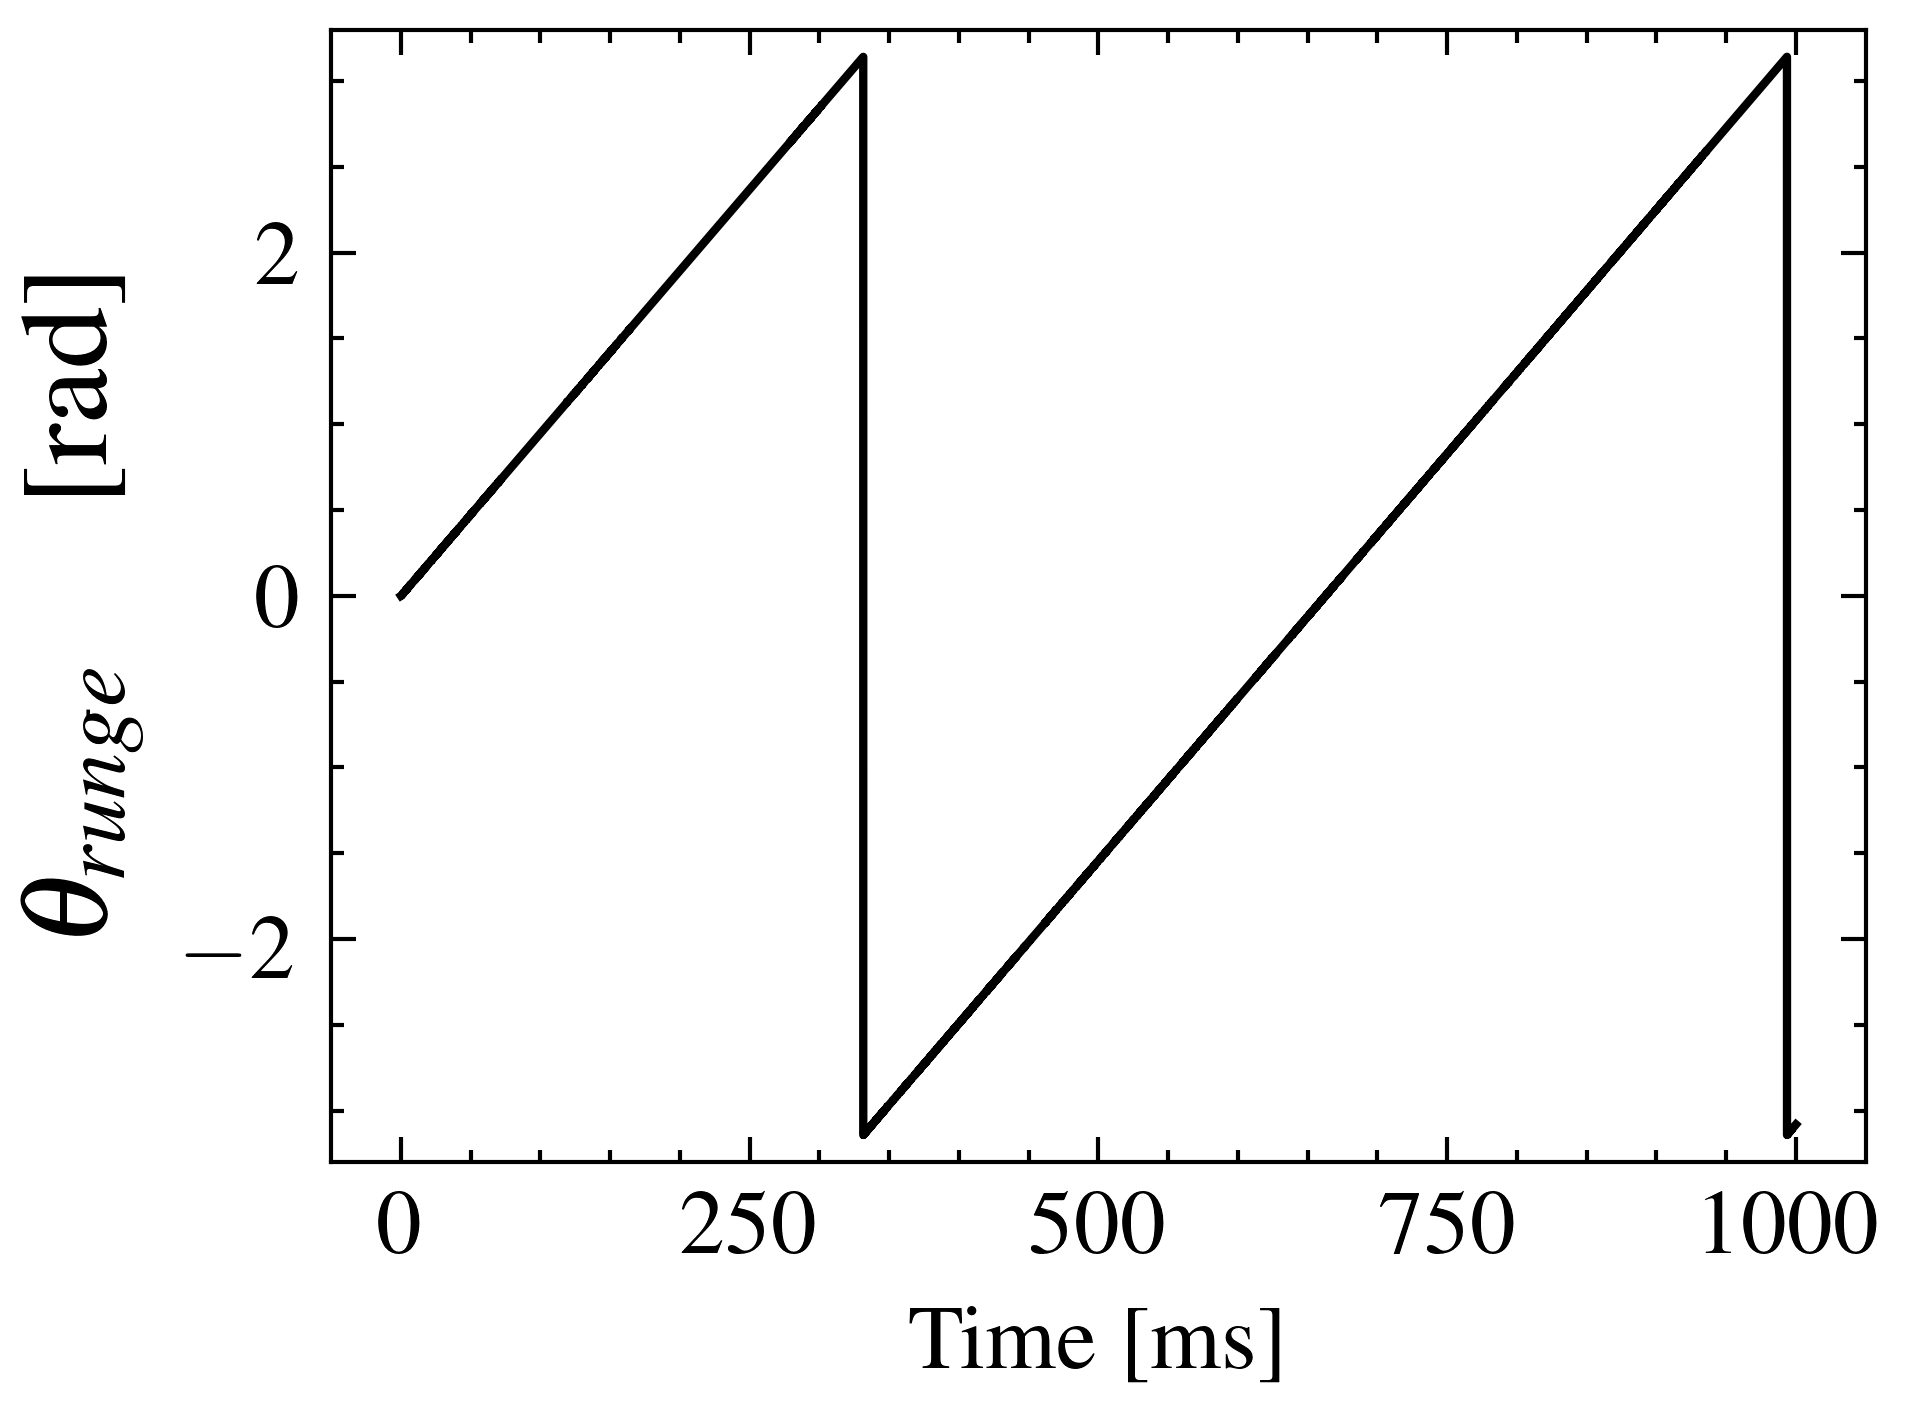

In [257]:
# ax1.plot(t_sol_runge, phase_dif_runge_analy)  # 3Hzの波を表示
# ax2.plot(t_sol_runge, phase_dif_adam_analy)
# ここでスタイルを指定する
# 今回は'science'と'ieee'を利用してみる
plt.style.use(['science', 'ieee'])
plt.rcParams["font.size"] = 11


# 図の表示
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylim(-3.3, 3.3)
plt.ylabel("y_label", fontsize=15)
ax.plot(t_sol_runge, phase_dif_runge_analy, label='Runge-Kutta method')  # 3Hzの波を表示
ax.set(xlabel='Time [ms]')    # x軸のラベル
ax.set(ylabel=r"$\theta_{runge}\quad$""  [rad]")  # y軸のラベル
fig.show()

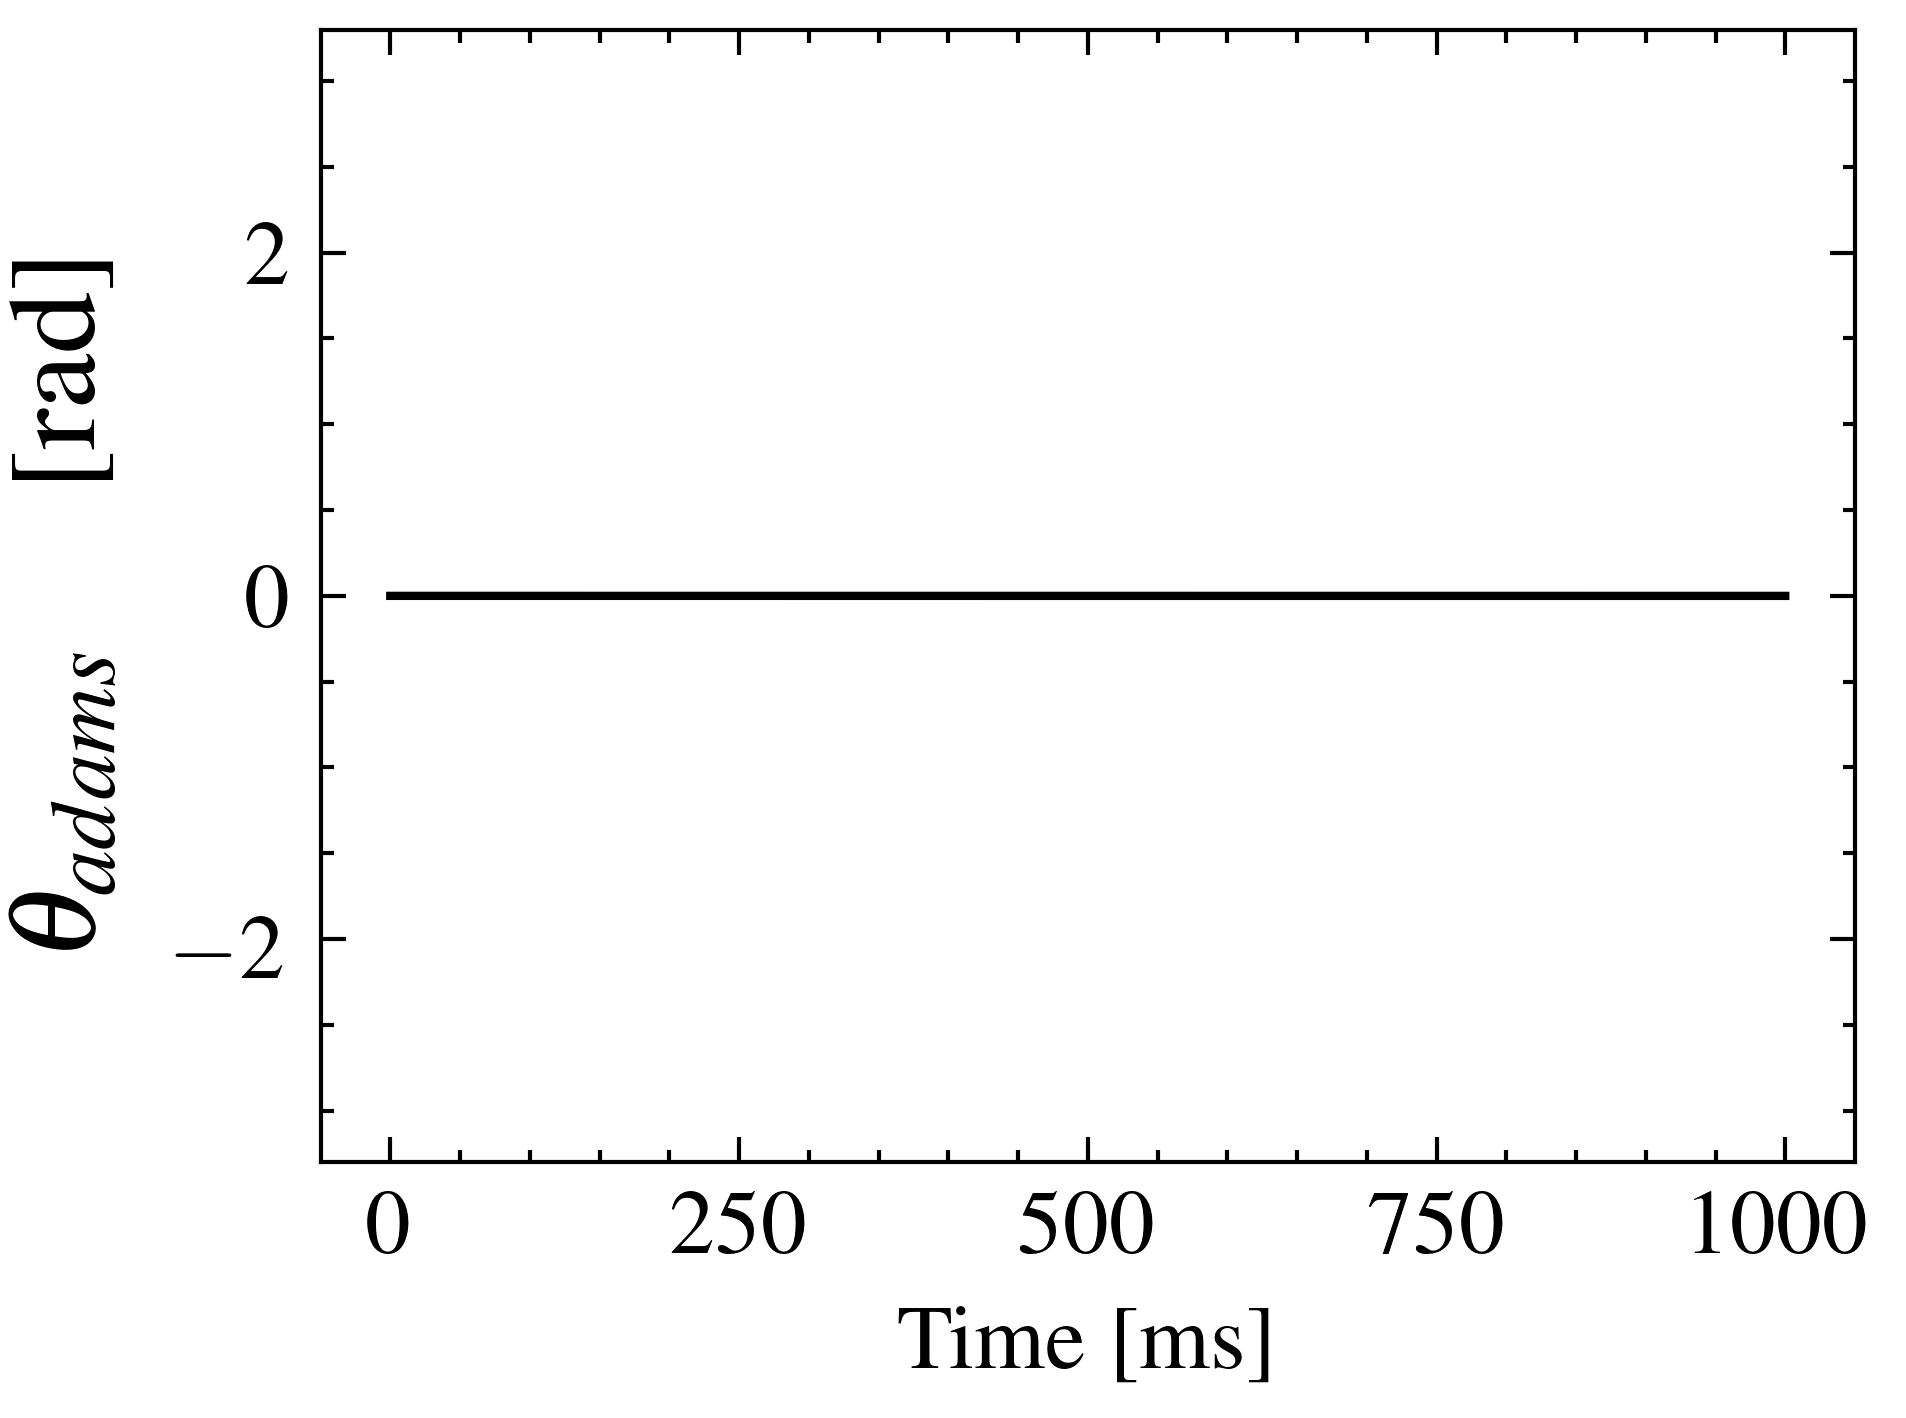

In [258]:
# ax1.plot(t_sol_runge, phase_dif_runge_analy)  # 3Hzの波を表示
# ax2.plot(t_sol_runge, phase_dif_adam_analy)
# ここでスタイルを指定する
# 今回は'science'と'ieee'を利用してみる
plt.style.use(['science', 'ieee'])
plt.rcParams["font.size"] = 11

# 図の表示
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylim(-3.3, 3.3)
plt.ylabel("y_label", fontsize=15)
ax.plot(t_sol_runge, phase_dif_adam_analy, label='Adams Moulton method')  # 3Hzの波を表示
ax.set(xlabel='Time [ms]')    # x軸のラベル
ax.set(ylabel=r"$\theta_{adams}\quad$""  [rad]")  # y軸のラベル

fig.show()